<a href="https://colab.research.google.com/github/Vaishnavirajulu21/deeplearning/blob/main/arrthymia_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/dataset/mitbih_train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/dataset/mitbih_test.csv', header=None)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [ ]:
train_df.describe


<bound method NDFrame.describe of             0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7    

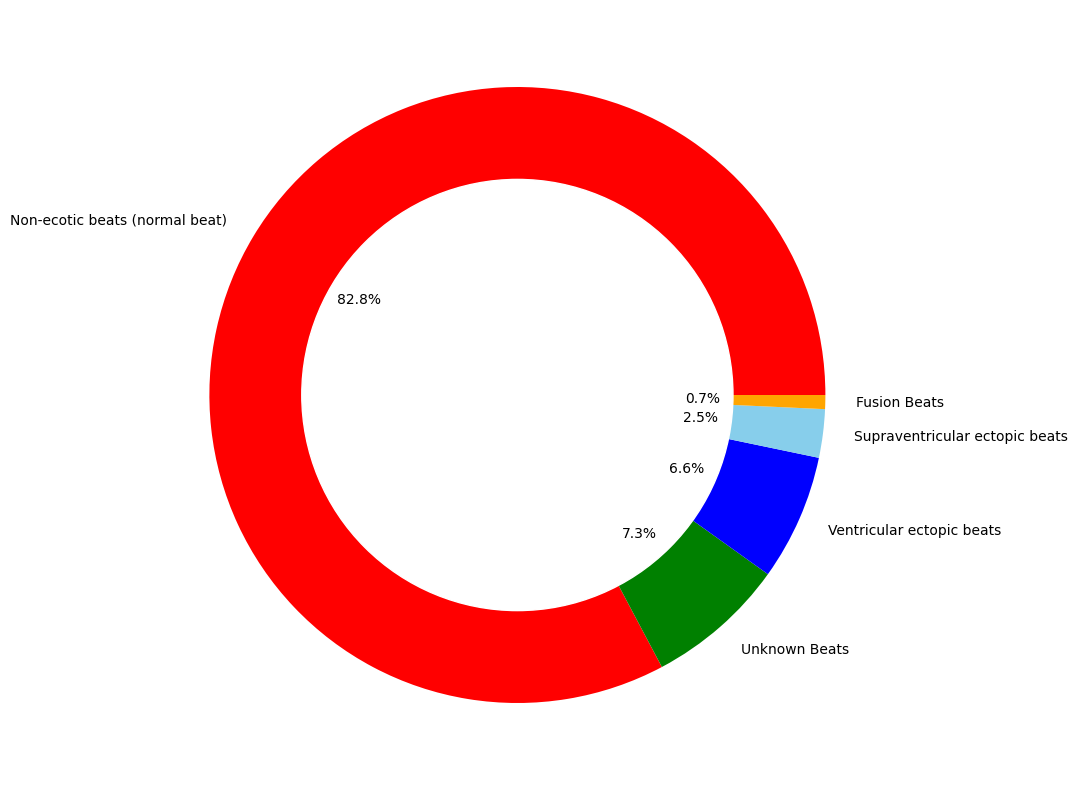

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Non-ecotic beats (normal beat)','Unknown Beats','Ventricular ectopic beats ','Supraventricular ectopic beats','Fusion Beats '], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


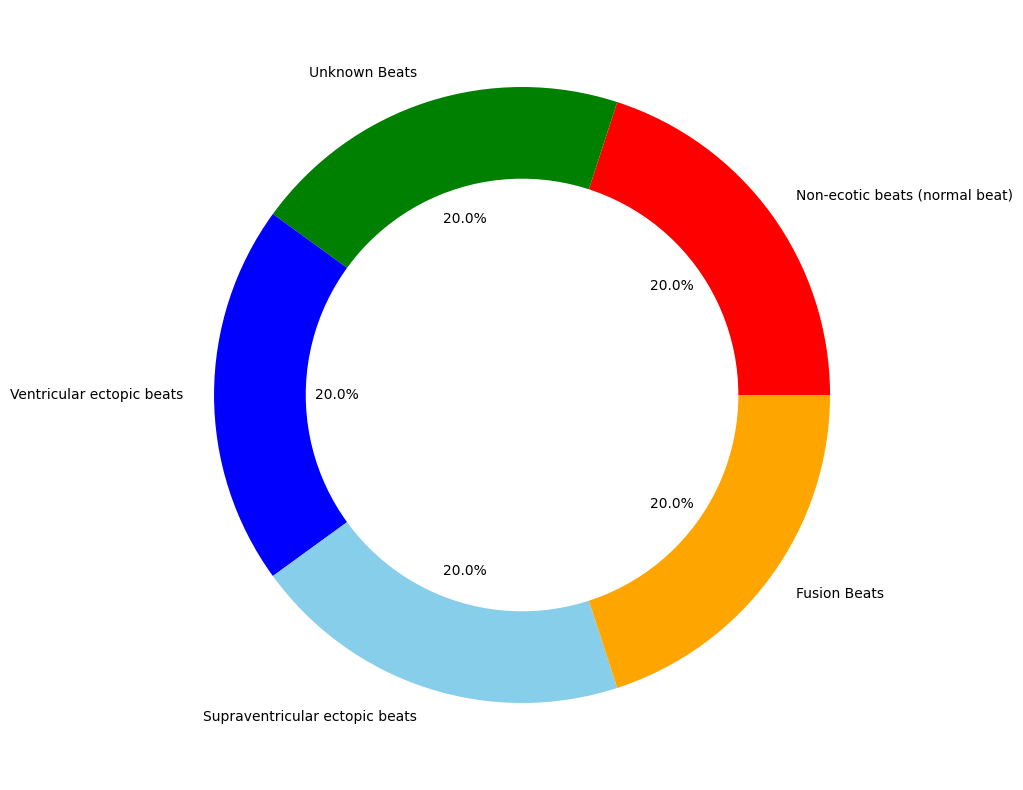

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Non-ecotic beats (normal beat)','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
52785,0.906863,0.905637,0.459559,0.000000,0.155637,0.209559,0.149510,0.137255,0.147059,0.148284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72956,1.000000,0.576923,0.307692,0.201923,0.144231,0.110577,0.129808,0.105769,0.129808,0.120192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78065,1.000000,0.918803,0.632479,0.376068,0.158120,0.051282,0.000000,0.059829,0.136752,0.200855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81083,1.000000,0.812071,0.562414,0.345679,0.220850,0.201646,0.205761,0.175583,0.172840,0.157750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86653,0.669279,0.559561,0.459248,0.313480,0.159875,0.050157,0.007837,0.000000,0.047022,0.130094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


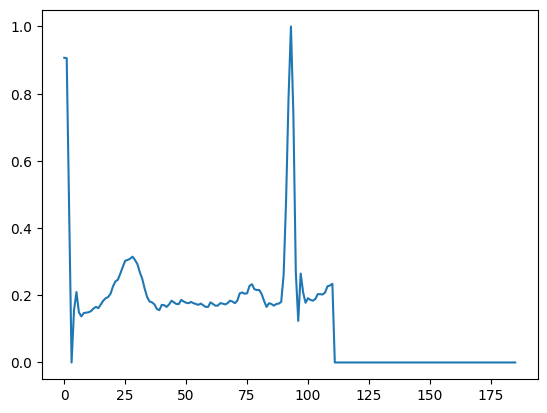

In [ ]:
plt.plot(c.iloc[0,:186])

In [ ]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()


1300000
1300000


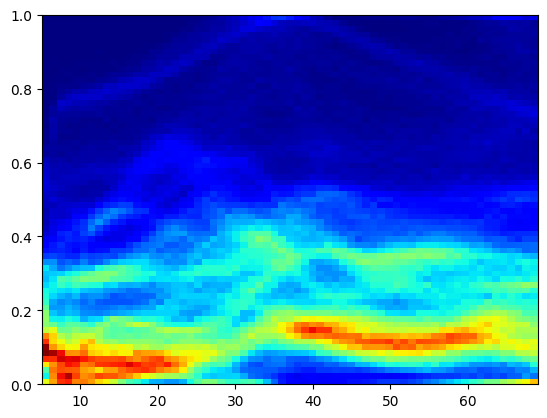

In [ ]:
plot_hist(0,70,5,65)

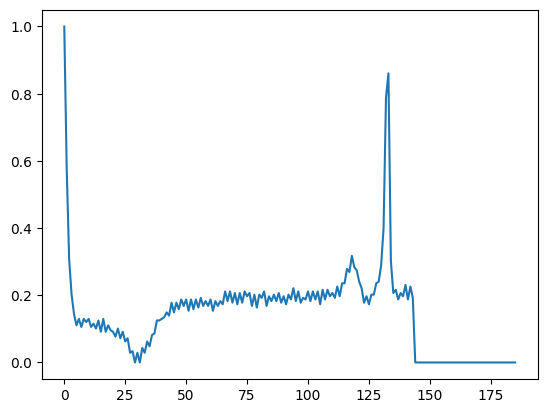

In [ ]:
plt.plot(c.iloc[1,:186])

900000
900000


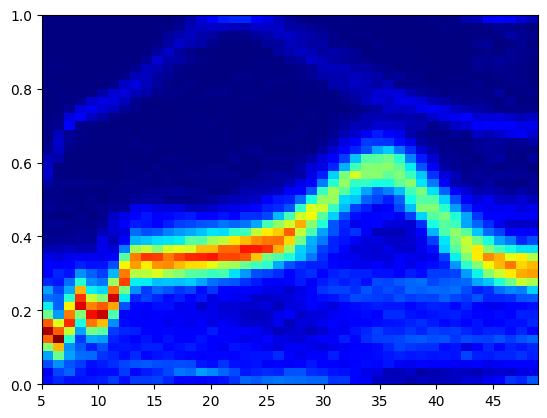

In [ ]:
plot_hist(1,50,5,45)

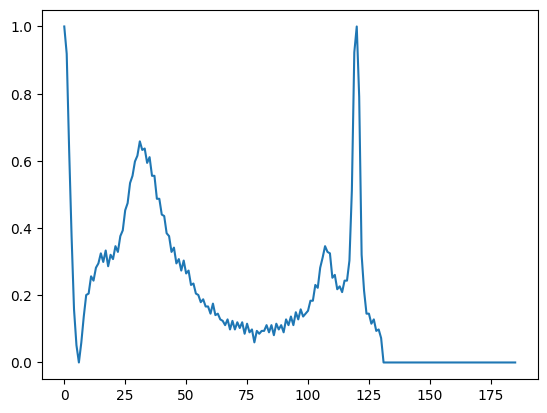

In [ ]:
plt.plot(c.iloc[2,:186])

900000
900000


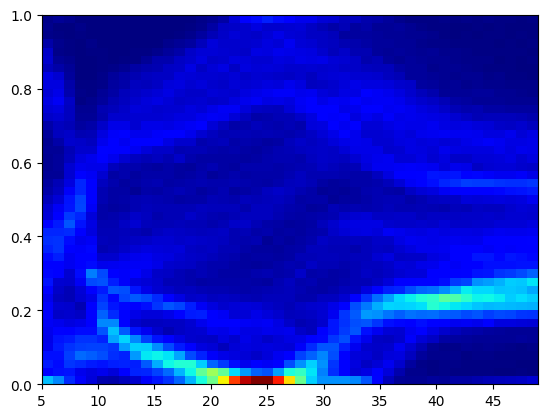

In [ ]:
plot_hist(2,50,5,45)

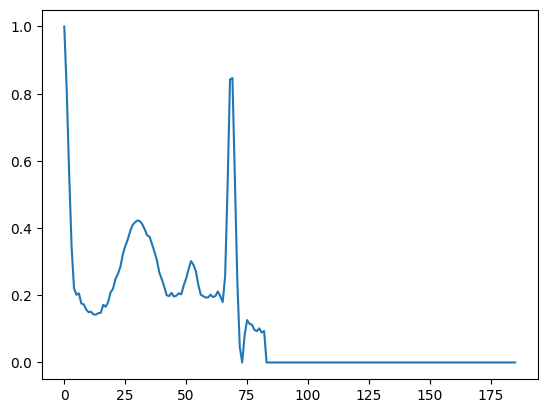

In [ ]:
plt.plot(c.iloc[3,:186])

900000
900000


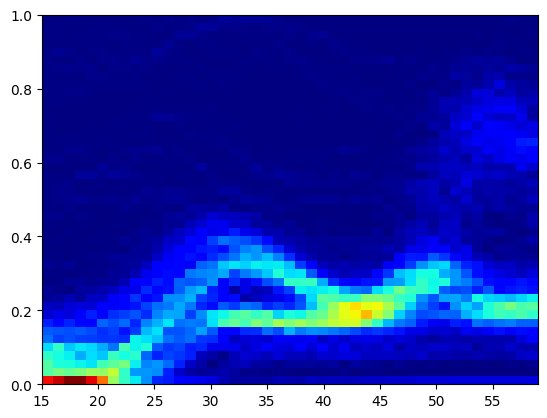

In [ ]:
plot_hist(3,60,15,45)

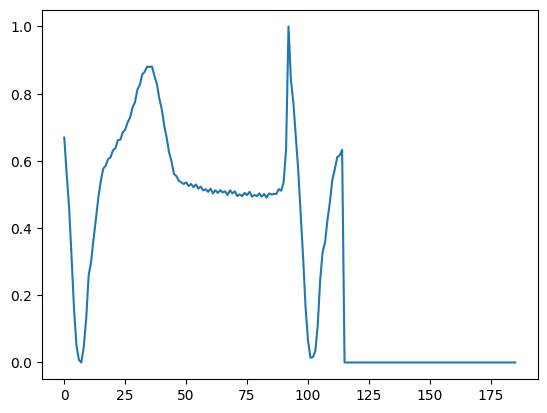

In [ ]:
plt.plot(c.iloc[4,:186])

700000
700000


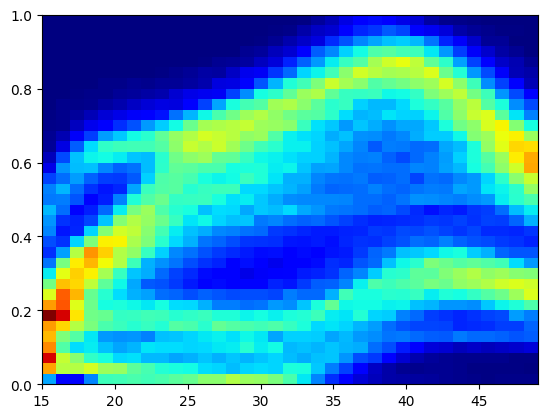

In [ ]:
plot_hist(4,50,15,35)

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

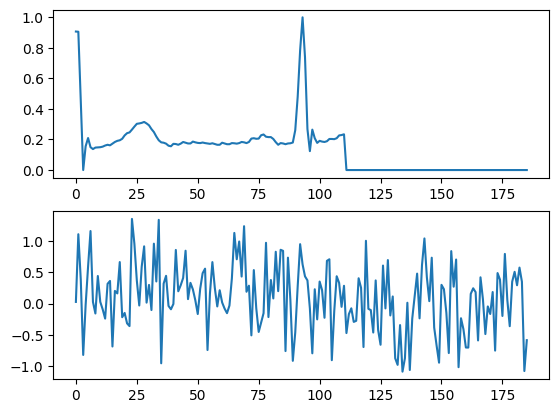

In [ ]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
def network(X_train,y_train,X_test,y_test):


    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])


    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=20,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)


In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
3125/3125 [==============================] - 120s 38ms/step - loss: 0.9047 - accuracy: 0.6539 - val_loss: 0.9250 - val_accuracy: 0.6931
Epoch 2/20
3125/3125 [==============================] - 121s 39ms/step - loss: 0.7940 - accuracy: 0.6981 - val_loss: 1.0272 - val_accuracy: 0.6470
Epoch 3/20
3125/3125 [==============================] - 116s 37ms/step - loss: 0.7613 - accuracy: 0.7126 - val_loss: 0.9062 - val_accuracy: 0.6705
Epoch 4/20
3125/3125 [==============================] - 117s 37ms/step - loss: 0.7319 - accuracy: 0.7233 - val_loss: 0.9210 - val_accuracy: 0.6557
Epoch 5/20
3125/3125 [==============================] - 116s 37ms/step - loss: 0.7045 - accuracy: 0.7336 - val_loss: 0.8406 - val_accuracy: 0.7011
Epoch 6/20
3125/3125 [==============================] - 121s 39ms/step - loss: 0.6804 - accuracy: 0.7419 - val_loss: 0.8936 - val_accuracy: 0.7264
Epoch 7/20
3125/3125 [==============================] - 121s 39ms/step - loss: 0.6536 - accuracy: 0.7521 - val_loss: 0

In [ ]:
model.save('ecg.h5')

In [ ]:
new_model=tf.keras.models.load_model('ecg.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 183, 32)           192       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 91, 32)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 91, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 87, 64)            10304     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 43, 64)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 43, 64)           

In [ ]:
X_train[0:1].shape

(1, 187, 1)

In [ ]:
new_model.predict(X_train[81122:81123])


1/1 [==============================] - 0s 92ms/step


array([[6.33e-02, 9.93e-06, 9.71e-05, 9.37e-01, 2.00e-06]], dtype=float32)

In [ ]:
predicted_classes = predict(new_model, X_train[81122:81123])
print(predicted_classes)

1/1 [==============================] - 0s 24ms/step
['Fusion beats']


Accuracy: 79.32%


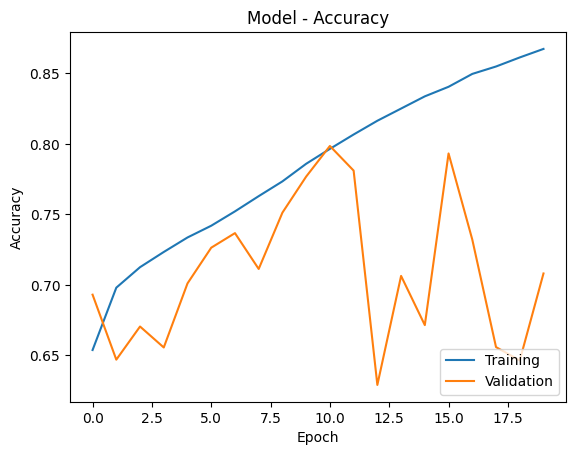

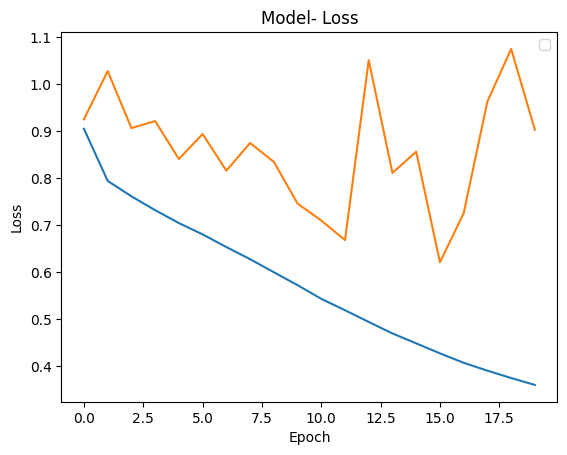

685/685 [==============================] - 6s 9ms/step


In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


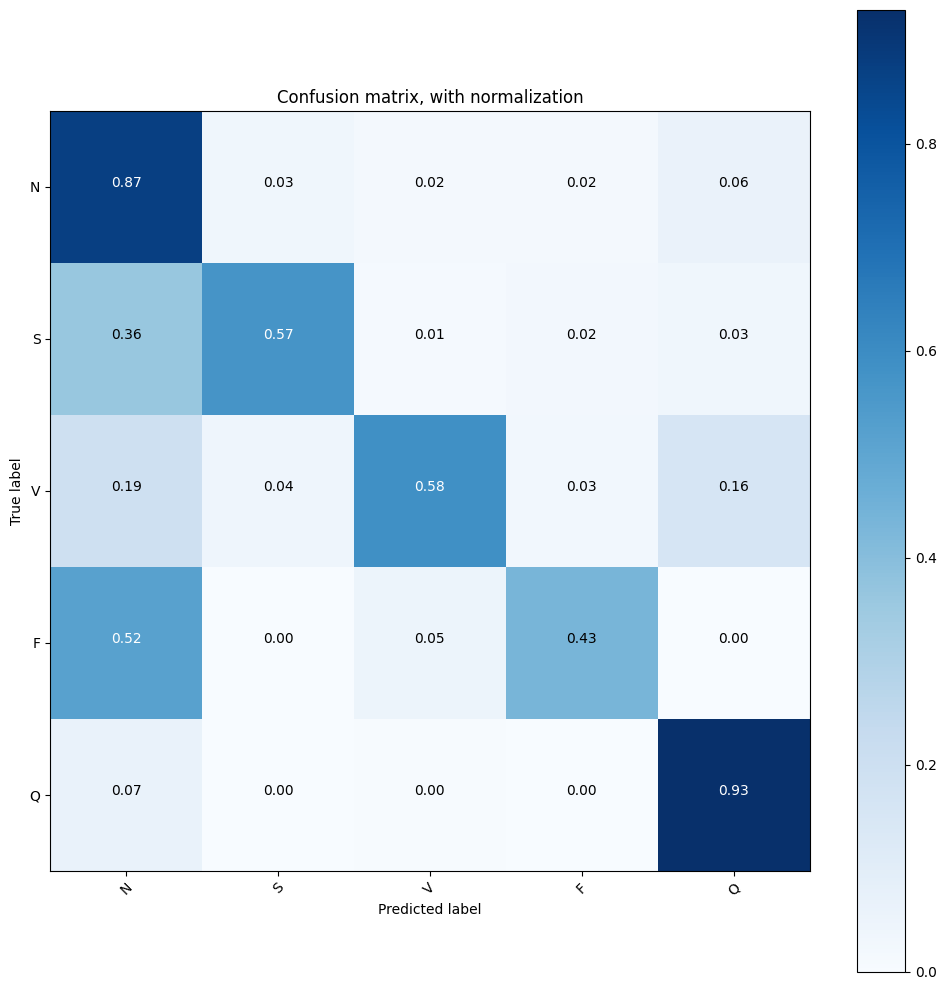

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
#importing numpy as np
import numpy as np
arr=[] #creating the array
# using loadtxt()
arr = np.loadtxt("/content/drive/MyDrive/dataset/mitbih_train.csv",  delimiter=",", dtype=str)
print("the array is=")
#displaying our result.
print(arr)

the array is=
[['9.779411554336547852e-01' '9.264705777168273926e-01'
  '6.813725233078002930e-01' ... '0.000000000000000000e+00'
  '0.000000000000000000e+00' '0.000000000000000000e+00']
 ['9.601139426231384277e-01' '8.632478713989257812e-01'
  '4.615384638309478760e-01' ... '0.000000000000000000e+00'
  '0.000000000000000000e+00' '0.000000000000000000e+00']
 ['1.000000000000000000e+00' '6.594594717025756836e-01'
  '1.864864826202392578e-01' ... '0.000000000000000000e+00'
  '0.000000000000000000e+00' '0.000000000000000000e+00']
 ...
 ['9.061224460601806641e-01' '6.244897842407226562e-01'
  '5.959183573722839355e-01' ... '0.000000000000000000e+00'
  '0.000000000000000000e+00' '4.000000000000000000e+00']
 ['8.582278490066528320e-01' '6.455696225166320801e-01'
  '8.455696105957031250e-01' ... '0.000000000000000000e+00'
  '0.000000000000000000e+00' '4.000000000000000000e+00']
 ['9.015063643455505371e-01' '8.458864688873291016e-01'
  '8.006952404975891113e-01' ... '0.000000000000000000e+00'


In [ ]:
import numpy as np
a =np.genfromtxt('/content/drive/MyDrive/dataset/mitbih_train.csv')

In [ ]:
import numpy as np

# Load the CSV file using numpy's loadtxt() function
data = np.loadtxt('/content/drive/MyDrive/dataset/mitbih_train.csv', delimiter=',')

# Print the data to verify it was loaded correctly
print(data)

[[0.98 0.93 0.68 ... 0.   0.   0.  ]
 [0.96 0.86 0.46 ... 0.   0.   0.  ]
 [1.   0.66 0.19 ... 0.   0.   0.  ]
 ...
 [0.91 0.62 0.6  ... 0.   0.   4.  ]
 [0.86 0.65 0.85 ... 0.   0.   4.  ]
 [0.9  0.85 0.8  ... 0.   0.   4.  ]]


In [ ]:
import numpy as np
a =np.genfromtxt('/content/drive/MyDrive/dataset/mitbih_test.csv', delimiter=',')

In [ ]:
import numpy as np

# Load the CSV file using numpy's loadtxt() function
data = np.loadtxt('/content/drive/MyDrive/dataset/mitbih_test.csv', delimiter=',')
# Print the data to verify it was loaded correctly
print(data)

[[1.   0.76 0.11 ... 0.   0.   0.  ]
 [0.91 0.78 0.53 ... 0.   0.   0.  ]
 [0.73 0.21 0.   ... 0.   0.   0.  ]
 ...
 [1.   0.97 0.62 ... 0.   0.   4.  ]
 [0.98 0.57 0.61 ... 0.   0.   4.  ]
 [0.97 0.91 0.87 ... 0.   0.   4.  ]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(3000, 1)))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 5 classes (one for each type of arrhythmia)
model.add(Dense(units=5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip install tensorflow
import tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def predict(model, x):
    y_pred = model.predict(x)
    class_pred = np.argmax(y_pred, axis=1)
    class_labels = ['Normal', 'Supraventricular ectopic beats', 'Ventricular ectopic beats', 'Fusion beats', 'unknown beats']
    return [class_labels[i] for i in class_pred]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

# Load the training and validation data
train_data = pd.read_csv('/content/drive/MyDrive/dataset/mitbih_train.csv', header=None)
val_data = pd.read_csv('/content/drive/MyDrive/dataset/mitbih_test.csv', header=None)

# Extract the features and labels from the training and validation data
def extract_features(data):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X = np.expand_dims(X, axis=2)
    return X, y

X_train, y_train = extract_features(train_data)
X_val, y_val = extract_features(val_data)

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_data = pd.read_csv('/content/drive/MyDrive/dataset/mitbih_test.csv', header=None)
X_test, y_test = extract_features(test_data)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict the classes for the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print the classification report
target_names = ['Normal beat', 'Supraventricular ectopic beats', 'Ventricular ectopic beats', 'Fusion beats', 'unknown beats']
print(classification_report(y_test, predicted_labels, target_names=target_names))

new_data = pd.read_csv('/content/drive/MyDrive/dataset/mitbih_test.csv', header=None)
X_new, y_new = extract_features(new_data)
predicted_classes = predict(model, X_new)
print(predicted_classes)

Epoch 1/10
2737/2737 [==============================] - 75s 27ms/step - loss: 0.2097 - accuracy: 0.9416 - val_loss: 0.1253 - val_accuracy: 0.9645
Epoch 2/10
2737/2737 [==============================] - 69s 25ms/step - loss: 0.1154 - accuracy: 0.9679 - val_loss: 0.0982 - val_accuracy: 0.9721
Epoch 3/10
2737/2737 [==============================] - 69s 25ms/step - loss: 0.0887 - accuracy: 0.9750 - val_loss: 0.0931 - val_accuracy: 0.9753
Epoch 4/10
2737/2737 [==============================] - 65s 24ms/step - loss: 0.0726 - accuracy: 0.9792 - val_loss: 0.0830 - val_accuracy: 0.9788
Epoch 5/10
2737/2737 [==============================] - 70s 25ms/step - loss: 0.0632 - accuracy: 0.9816 - val_loss: 0.0745 - val_accuracy: 0.9814
Epoch 6/10
2737/2737 [==============================] - 68s 25ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0732 - val_accuracy: 0.9803
Epoch 7/10
2737/2737 [==============================] - 72s 26ms/step - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.0712 -